# DBSCAN Clustering

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
# from itertools import islice, cycle


## Example 1

In [ ]:
# Configuration options
num_samples_total = 1000
cluster_centers = [(3,3), (6,6)]
num_classes = len(cluster_centers)


# Generate data
X, y = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.5)


In [ ]:
print(X.shape, type(X))
print(X[:5,:])
y[:5]

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [ ]:

# Compute DBSCAN
# dbs = DBSCAN(eps=epsilon, min_samples=min_samples)
# db = dbs.fit(X)
epsilon = 0.5
min_samples = 13
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_
#labels

In [ ]:
no_clusters = len(np.unique(labels) )
no_clusters

In [ ]:
np.unique(labels)

In [ ]:

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

In [ ]:
plt.scatter(X[:,0],X[:,1],c=labels)

## Example 2

In [13]:
from sklearn import cluster, datasets
np.random.seed(0)
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.08)

In [15]:
noisy_circles

(array([[-0.66860703, -0.68582576],
        [ 0.8920046 ,  0.26103005],
        [ 0.57727663, -0.00711419],
        ...,
        [-0.33533857, -0.36568776],
        [ 0.04510603, -0.91247874],
        [ 0.95144935, -0.64304184]]), array([0, 0, 1, ..., 1, 0, 0]))

In [14]:
print(type(noisy_circles))
print(noisy_circles[0].shape, noisy_circles[1].shape)
print(noisy_circles[0][:5,:])
print(noisy_circles[1][:5])

<class 'tuple'>
(1500, 2) (1500,)
[[-0.66860703 -0.68582576]
 [ 0.8920046   0.26103005]
 [ 0.57727663 -0.00711419]
 [ 0.85689593  0.33776785]
 [ 0.47628018 -0.26803736]]
[0 0 1 0 1]


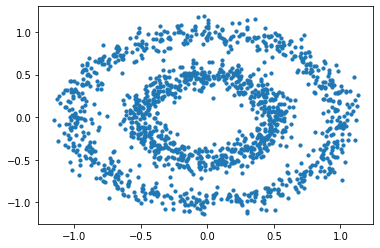

In [16]:
#plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], c=noisy_circles[1])
plt.scatter(noisy_circles[0][:,0], noisy_circles[0][:,1], s=10)

In [17]:
eps = 0.2
X, y = noisy_circles
# normalize dataset
X = StandardScaler().fit_transform(X)

dbscan = cluster.DBSCAN(eps=eps)
dbscan.fit(X)
#y_pred = dbscan.labels_.astype(np.int) # np.int is deprecated and need to be replaced by int
y_pred = dbscan.labels_.astype(int)
np.unique(y_pred)

array([-1,  0,  1])

In [18]:
# creating colors array with color values corresponding to the predicted label
# pred: 1 color '#FE4A49', pred:0 color '#2AB7CA', pred: -1 color "#000000"
colors = np.full(len(y_pred), '#FE4A49')
colors[:] = np.where(y_pred == 0,  '#2AB7CA', colors[:])
colors[:] = np.where(y_pred == -1,  "#000000", colors[:])
np.unique(colors)

array(['#000000', '#2AB7CA', '#FE4A49'], dtype='<U7')

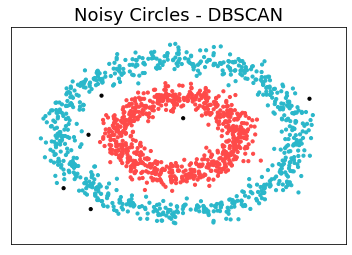

In [19]:
plt.title('Noisy Circles - DBSCAN', size=18)
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.xticks(())
plt.yticks(())
#plot_num += 1

plt.show()    

### DBSCAN

Density-based Spatial Clustering of Applications with Noise Decision, commonly abbreviated as DBSCAN, is a common data clustering algorithm that is used in data mining and machine learning. DBSCAN is one of the most academically cited methods of clustering data. DBSCAN is especially potent on larger sets of data that have considerable noise; the algorithm works well on odd shaped datasets.

DBSCAN is an **unsupervised learning algorithm, ie. it needs no training data**, it performs the computation on the actual dataset. This should be apparent from the fact that with DBSCAN, we are just trying to group similar data points into clusters, there is no prediction involved

*DBSCAN looks into the spatial density of data points. With DBSCAN, you don’t have to preemptively specify the number of clusters you want in the dataset, unlike k-means. All you need to provide is a value for minimum number of points in a given space and a distance value for what measure of distance is considered “close”.*

**Ɛ Neighborhood:**
The Ɛ Neighborhood (Epsilon Neighborhood) is an important concept in the algorithm. Mathematically, it can be defined as:
- The set of all points whose distance from a given point is less than some specified number epsilon.
- The Ɛ Neighborhood of a point p is a set of all points that are at most some Ɛ (with Ɛ > 0) distance away from it. In a 2D space, such a locus is a circle, with the point p being the center of the circle. In a 3D space, that would be a sphere. Essentially, the Ɛ Neighborhood of a point p is the N Sphere with the point p as the center and the radius being Ɛ.
- Smaller the value of Ɛ, the lesser the number of points in the neighborhood of p and vise-versa.

**Density**
Typically, density is mass/volume; in our case, given a point p we can define:
- Mass of the neighborhood: Number of data points in the neighborhood
- Volume: Volume of the resultant shape of the Ɛ neighborhood. For a 2D dataset, this would be the area of the circle encapsulated by the Ɛ Neighborhood.

**For example**, let’s take the value of Ɛ as 0.5, and take the number of points in the neighborhood as 40, then we have:
- Mass = 40
- Volume = π * (0.5)2
- Density = 40 / (π * 0.25) = 50.9

This value of density is meaningless in itself, but will play a very significant role in how we cluster the dataset using DBSCAN. In essence, what DBSCAN is actively looking for is dense neighborhoods, with most data points in a relatively small volume.

**DBSCAN takes in two parameters**:
- Ɛ - The radius of the neighborhoods around any arbitrary data point.
- minPoints - The minimum number of data points we want in a neighborhood to define a cluster.

**DBSCAN classifies each data point into one of three categories**:
- **Core point**: A data point, p, is considered as a core point if the neighborhood at the distance Ɛ has at least minPoints number of data points in it.
- **Border point**: A data point, p, is considered as a border point if the neighborhood at the distance Ɛ has less than minPoints number of data points in it, but p is reachable from at least one of the core points.
- **Outliers**: A data point p, is an outlier if the neighborhood at the distance Ɛ has less than minPoints number of data points in it and p is not reachable from any of the core points.

**Steps to cluster a data set through DBSCAN**
1. Sequentially pick points that have not been assigned to a cluster or named an outlier.
2. Compute its Ɛ neighborhood to see if it is a core point. If not assign it as an outlier (for now).
3. If it is a core point, label it as a cluster (this works since we sequentially go though the points which are already not part of a cluster). Add Directly Density Reachable neighbor points to its cluster.
4. Perform jumps from the neighborhood points to find all density reachable clusters (Indirect Density Reachable to the origin point). If there is any data point which is labeled as an outlier, change the status and assign it the current cluster - this points are our border points explained above.
5. Repeat the above 4 steps until each point in the dataset has either been assigned a cluster or has been marked as an outlier.

#### Pseudocode For The DBSCAN Algorithm:
1. Iterate though all the points in the data set - assume all of them to be outliers.
2. For any arbitrary point p, we now retrieve all points density-reachable from p.
3. If the number of points in the Ɛ neighbourhood is equal to or greater than the minPoints, p is a core point and a new cluster is formed.
4. Next, we go through each point in the newly formed cluster in BFS fashion and find the points in their respective Ɛ neighbourhood, ie. we are finding all indirectly density reachable points from p.
5. Once we have retrived all the indirectly density reachable points, we have now completed out cluster. We move on to the next point still marked as an outlier and repeat steps 1 through 4.
6. The algorithms stops once all the points in the data sets are visited.

### The below code plots the above 2 example in a single plot...

In [ ]:
eps = 0.2

datasets = [
    noisy_circles,
    noisy_moons,
]

plot_num=1
for i_dataset, dataset in enumerate(datasets):

    X, y = dataset
    # normalize dataset
    X = StandardScaler().fit_transform(X)
    
    dbscan = cluster.DBSCAN(eps=eps)
    dbscan.fit(X)

    y_pred = dbscan.labels_.astype(np.int)

    #plt.subplot(len(datasets), 1, plot_num)
    plt.subplot(len(datasets), 1, plot_num)
    if i_dataset == 0:
        plt.title('DBSCAN', size=18)

    colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

    # add black color for outliers (if any)
    colors = np.append(colors, ["#000000"])

    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plot_num += 1

plt.show()    